In [1]:
from __future__ import absolute_import, division, print_function
import os
import numpy as np
import numpy.random as npr
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
import sys
import json
import matplotlib.pyplot as plt

from pathlib import Path
import dotenv
dotenv.load_dotenv()
p_code = Path(os.environ.get("HOME_DIR"))
p_data = Path(os.environ.get("DATA_DIR"))

net = 'stepnet'
PATH_YANGNET = os.path.join(p_code,net) 
sys.path.insert(0, PATH_YANGNET)

from task import generate_trials, rule_name, rule_index_map, rules_dict
from network import Model, get_perf, FixedPoint_Model
import tools
from tools_lnd import same_mov_inds, get_interp_filename
from tools_lnd import bifurc, plot_bifurc_ends, take_names, gen_mov_trial_set, make_D_use, gen_trials_from_model_dir

Instructions for updating:
non-resource variables are not supported in the long term


In [2]:
# ##################################################################
# #fig save path
# ##################################################################

epoch_set_master = ['stim1','stim1']
fig = 'fig2'
figpath = os.path.join(p_code,'figs',fig,'fig2_BDFH')
if not os.path.exists(figpath):
    os.makedirs(figpath)

In [3]:
# ##################################################################
# #Find right model dir
# ##################################################################

rule_trains = ['delaygo','delayanti']
ruleset = 'mem_motifs_small'
file = 'LeakyRNN_softplus_diag_2_tasks_256_n_rnn_lr7.0l2_w6.0_h6.0_delaygo_delayanti_0'
m = os.path.join(p_data,fig,file)


In [4]:
q_thresh = 1e-8
offset = 0
t_set = [offset, offset]
trial_num = [int(offset/4), int(offset/4)]
rule_axs = 0
rule_set = [5,2]
trial_set = gen_mov_trial_set(m,rule_set)
epoch_set = ['fix1','fix1']
epoch = epoch_set[rule_axs]
rule = rules_dict['all'][rule_set[rule_axs]]
ti = trial_num[rule_axs]

rule1 = rules_dict['all'][rule_set[0]]
rule2 = rules_dict['all'][rule_set[1]]
rule_str = [rule1,rule2]

ax_labels = 'pca_h'
D_fix = make_D_use(m,rule,'fix1',ti,ax_labels)
D_use = D_fix

epoch_name_ax, rule_name_ax, _, _ = take_names(epoch_set[rule_axs],rules_dict['all'][rule_set[rule_axs]])
ax_labels_master = [r"$\bf{"+rule_name_ax+"}$"+'\n '+epoch_name_ax+' State PC1',
                    r"$\bf{"+rule_name_ax+"}$"+'\n '+epoch_name_ax+' State PC2',
                    r"$\bf{"+rule_name_ax+"}$"+'\n '+epoch_name_ax+' State PC3']

Instructions for updating:
Use output_signature instead
Instructions for updating:
Use output_signature instead
Instructions for updating:
This is a deprecated API that should only be used in TF 1 graph mode and legacy TF 2 graph mode available through `tf.compat.v1`. In all other situations -- namely, eager mode and inside `tf.function` -- you can consume dataset elements using `for elem in dataset: ...` or by explicitly creating iterator via `iterator = iter(dataset)` and fetching its elements via `values = next(iterator)`. Furthermore, this API is not available in TF 2. During the transition from TF 1 to TF 2 you can use `tf.compat.v1.data.make_one_shot_iterator(dataset)` to create a TF 1 graph mode style iterator for a dataset created through TF 2 APIs. Note that this should be a transient state of your code base as there are in general no guarantees about the interoperability of TF 1 and TF 2 code.
Instructions for updating:
Call initializer instance with the dtype argument instea

/Users/lauradriscoll/miniconda3/envs/flex_mult/lib/python3.10/site-packages/tensorflow/python/keras/engine/base_layer_v1.py:1702: UserWarning: `layer.add_variable` is deprecated and will be removed in a future version. Please use `layer.add_weight` method instead.
  warnings.warn('`layer.add_variable` is deprecated and '


Instructions for updating:
Use `tf.global_variables_initializer` instead.


2024-03-28 23:45:02.264016: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:388] MLIR V1 optimization pass is not enabled


INFO:tensorflow:Restoring parameters from /Users/lauradriscoll/Documents/data/flexible_multitask/fig2/LeakyRNN_softplus_diag_2_tasks_256_n_rnn_lr7.0l2_w6.0_h6.0_delaygo_delayanti_0/model.ckpt
Model restored from file: /Users/lauradriscoll/Documents/data/flexible_multitask/fig2/LeakyRNN_softplus_diag_2_tasks_256_n_rnn_lr7.0l2_w6.0_h6.0_delaygo_delayanti_0/model.ckpt
Variables being optimized:
<tf.Variable 'rnn/leaky_rnn_cell/kernel:0' shape=(276, 256) dtype=float32_ref>
<tf.Variable 'rnn/leaky_rnn_cell/bias:0' shape=(256,) dtype=float32_ref>
<tf.Variable 'output/weights:0' shape=(256, 3) dtype=float32_ref>
<tf.Variable 'output/biases:0' shape=(3,) dtype=float32_ref>
INFO:tensorflow:Restoring parameters from /Users/lauradriscoll/Documents/data/flexible_multitask/fig2/LeakyRNN_softplus_diag_2_tasks_256_n_rnn_lr7.0l2_w6.0_h6.0_delaygo_delayanti_0/model.ckpt
Model restored from file: /Users/lauradriscoll/Documents/data/flexible_multitask/fig2/LeakyRNN_softplus_diag_2_tasks_256_n_rnn_lr7.0l2

In [ ]:
interp = True
fig_size = 6

epoch_set = ['fix1','fix1']
script_name = 'interp_tasks_small_init_stim'

ax_use = [0,1,2]
D_rotate = D_use[:,ax_use]
ax_labels = [ax_labels_master[alm] for alm in ax_use]

ax_labels[2] = ax_labels_master[1] 
ax_labels[1] = ax_labels_master[0] 
ax_labels[0] = r"Rule Input $\alpha$"

bifurc(m,D_rotate,rule_set,epoch_set,script_name = script_name,q_thresh = q_thresh, rule_axs = rule_axs, 
       color_stim = True, fig_size = fig_size,fontsize = 16, figpath = figpath, ruleset = ruleset,
       ax_labels = ax_labels, stability_thresh = 1.05, lims = [])

ax_labels[1] = ax_labels_master[1] 
ax_labels[0] = ax_labels_master[0] 

plot_bifurc_ends(m, D_rotate, rule_set, epoch_set, script_name, lims = [], fac_mult_lims = 1,
                 stability_thresh = 1.05, fp_first = False, figpath = figpath, ruleset = ruleset,
                ax_labels = [ax_labels[0],ax_labels[1]],q_thresh = q_thresh)

/Users/lauradriscoll/miniconda3/envs/flex_mult/lib/python3.10/site-packages/tensorflow/python/keras/engine/base_layer_v1.py:1702: UserWarning: `layer.add_variable` is deprecated and will be removed in a future version. Please use `layer.add_weight` method instead.
  warnings.warn('`layer.add_variable` is deprecated and '


Variables being optimized:
<tf.Variable 'rnn/leaky_rnn_cell/kernel:0' shape=(276, 256) dtype=float32_ref>
<tf.Variable 'rnn/leaky_rnn_cell/bias:0' shape=(256,) dtype=float32_ref>
<tf.Variable 'output/weights:0' shape=(256, 3) dtype=float32_ref>
<tf.Variable 'output/biases:0' shape=(3,) dtype=float32_ref>
INFO:tensorflow:Restoring parameters from /Users/lauradriscoll/Documents/data/flexible_multitask/fig2/LeakyRNN_softplus_diag_2_tasks_256_n_rnn_lr7.0l2_w6.0_h6.0_delaygo_delayanti_0/model.ckpt
Model restored from file: /Users/lauradriscoll/Documents/data/flexible_multitask/fig2/LeakyRNN_softplus_diag_2_tasks_256_n_rnn_lr7.0l2_w6.0_h6.0_delaygo_delayanti_0/model.ckpt
Variables being optimized:
<tf.Variable 'rnn/leaky_rnn_cell/kernel:0' shape=(276, 256) dtype=float32_ref>
<tf.Variable 'rnn/leaky_rnn_cell/bias:0' shape=(256,) dtype=float32_ref>
<tf.Variable 'output/weights:0' shape=(256, 3) dtype=float32_ref>
<tf.Variable 'output/biases:0' shape=(3,) dtype=float32_ref>
INFO:tensorflow:Rest

In [20]:
from tools_lnd import same_stim_trial, gen_X_from_model_dir, get_T_inds, plot_bifurc, comp_eig_decomp
from tools_lnd import axis_label_bifurc, vanilla_run_with_h0, title_label_bifurc, check_plot_zero_plane

In [21]:
def plot_bifurc(ax,x_traj,threeD,linestyle = '-',c = 'r',cd = 'k',lw = 6,alpha = 1,ms = 6):

    if threeD:
            plt.plot(x_traj[:,0],x_traj[:,1],x_traj[:,2],
                     linestyle,
                     c = c, 
                     linewidth = lw, 
                     alpha = alpha, 
                     markersize = ms)
            plt.plot(x_traj[:,0],x_traj[:,1],x_traj[:,2],
                     linestyle,
                     c = cd, 
                     linewidth = lw/2, 
                     alpha = np.min((1,alpha*2)), 
                     markersize = ms)
            
            ax.scatter(x_traj[-1,0],x_traj[-1,1],x_traj[-1,2],
                       s = 300,
                       marker = '^',
                       facecolors = cd, 
                       edgecolors = c,
                       linewidth = lw/2, 
                       alpha = alpha)
            ax.scatter(x_traj[0,0],x_traj[0,1],x_traj[0,2],
                       s = 300,
                       marker = 'x',
                       facecolors = c,
                       linewidth = lw/2, 
                       alpha = alpha)
            ax.scatter(x_traj[0,0],x_traj[0,1],x_traj[0,2],
                       s = 200,
                       marker = 'x',
                       facecolors = cd, 
                       linewidth = lw/4, 
                       alpha = alpha)
    else:
            plt.plot(x_traj[:-3,0],x_traj[:-3,1],
                     linestyle,
                     c = c, 
                     linewidth = lw, 
                     alpha = alpha, 
                     markersize = ms)
            plt.plot(x_traj[:-2,0],x_traj[:-2,1],
                     linestyle,
                     c = cd, 
                     linewidth = lw/2, 
                     alpha = alpha, 
                     markersize = ms)
            
            ax.scatter(x_traj[0,0],x_traj[0,1],
                       s = 300,
                       marker = 'x',
                       facecolors = c,
                       linewidth = lw/2, 
                       alpha = alpha)
            ax.scatter(x_traj[0,0],x_traj[0,1],
                       s = 200,
                       marker = 'x',
                       facecolors = cd, 
                       linewidth = lw/4, 
                       alpha = alpha)
            ar = ax.annotate("", xy=(x_traj[-1,:2]), xytext=(x_traj[-2,:2]),size=30,
                                    arrowprops=dict(fc=cd, ec=c,arrowstyle='simple', lw=2),)

In [13]:
def bifurc_local_linear(m,D_use,rule_set,epoch_set,t_set = [0,0],script_name = 'interp_tasks_small_init_mov',
           cmap_grad = plt.get_cmap('plasma'),cmap_discrete = ['w','k'],q_thresh = .001,
           n_skip_interps=1, rule_axs = 0,ax_labels = 'pca_h', plot_unstable = True,
           color_stim = True,fig_size = 4, fontsize = 20, figpath = [],ruleset = [],
           title_y = .9, n_interp = 20,n_trials = 0, stability_thresh = 1, threeD = True,
           lims = [], view_ang = [],lw = 6,ms = 6,linestyle = '-',al_state = 1,al_fp = 1, 
           bifurc = True, plot_zero_plane = False, tol_q = 1e-6, plot_jitter = False, n_jit = 0, n_steps = 50):
    
    plt.rcParams.update({'font.size': fontsize})

    fig = plt.figure(figsize=(fig_size,fig_size),tight_layout=True,facecolor='white')
    if threeD:
        ax = fig.add_axes([0,0,1,1], projection='3d');
    else:
        ax = fig.add_axes([0,0,1,1]);

    rule1 = rules_dict['all'][rule_set[0]]
    rule2 = rules_dict['all'][rule_set[1]]
    rule_str = [rule1,rule2]

    epoch = epoch_set[rule_axs]
    epoch_name_ax, rule_name_ax, _, _ = take_names(epoch,rules_dict['all'][rule_set[rule_axs]])
    epoch_name1, rule_name1, _, _ = take_names(epoch_set[0],rule1)
    epoch_name2, rule_name2, _, _ = take_names(epoch_set[1],rule2)

    if color_stim:
        trial1 = gen_trials_from_model_dir(m,rule1,mode='test',noise_on = False)
        trial2 = same_stim_trial(trial1, rule_set[1]) 
        trial1 = gen_trials_from_model_dir(m,rule1,mode='test',noise_on = False)
    else:
        trial1 = gen_trials_from_model_dir(m,rule1,mode='test',noise_on = False)
        trial2 = gen_trials_from_model_dir(m,rule2,mode='test',noise_on = False)
        trial2 = same_mov_inds(trial1, trial2) 
        trial1 = gen_trials_from_model_dir(m,rule1,mode='test',noise_on = False)

    save_dir = os.path.join(m,script_name,rule_str[0]+'_'+rule_str[1],'tol_q_e_'+str(-np.log10(tol_q)))
    filename_interp = get_interp_filename(trial1,trial2,epoch_set,t_set)

    for ri in range(2):

        cd = cmap_discrete[ri]
        trial = gen_trials_from_model_dir(m,rule_str[ri],mode='test',noise_on = False)
        
        #get traj
        _,x = gen_X_from_model_dir(m,trial)
        T_inds = get_T_inds(trial,epoch_set[ri])
        x_epoch = np.transpose(x[:,:,T_inds],(1,2,0))
        
        #get state colors
        cmap_state = plt.get_cmap('hsv')
        if color_stim:
            c_set = np.min(trial.stim_locs[:,[0,2]],axis = 1)
            s = np.argwhere(c_set == np.min(trial1.stim_locs[t_set[0],[0,2]]))[0][0]
            c = cmap_state(c_set[s]/(2*np.pi))
        else:
            c_set = trial.y_loc[-1,:]
            s = np.argwhere(c_set==trial1.y_loc[-1,t_set[0]])[0][0]
            c = cmap_state(c_set[s]/(2*np.pi))
            
        #plot other trials   
        if n_trials==0:
            trial_set = range(0)
        else:
            trial_set = range(0,np.shape(trial.x)[1],int(np.shape(trial.x)[1]/n_trials))
            
        for trial_i in trial_set:
            ci = cmap_state(c_set[trial_i]/(2*np.pi))
            x_traj_i = np.dot(x_epoch[trial_i,:,:],D_use)
            if bifurc:
                x_traj_i[:,2] = x_traj_i[:,1]
                x_traj_i[:,1] = x_traj_i[:,0]
                x_traj_i[:,0] = ri*np.ones(len(T_inds))
            plot_bifurc(ax,x_traj_i,threeD,c = ci,cd = cmap_discrete[ri],lw = lw,alpha = .1,ms = ms)
        
        #plot fp trial
        x_traj = np.dot(x_epoch[s,:,:],D_use)
        if bifurc:
            x_traj[:,2] = x_traj[:,1]
            x_traj[:,1] = x_traj[:,0]
            x_traj[:,0] = ri*np.ones(len(T_inds))
        plot_bifurc(ax,x_traj, threeD, c = c, cd = cmap_discrete[ri],lw = lw,ms = ms)

        #set x-axis to ri if bifurcation diaram
        if bifurc:
            x_traj[:,0] = ri*np.ones(len(T_inds))
            
            
    if plot_jitter:
        
        model = FixedPoint_Model(m)
        with tf.Session() as sess:
            model.restore()
            model._sigma=0
            hparams = model.hp
            alpha = hparams['dt']/hparams['tau']
            var_list = model.var_list
            params = [sess.run(var) for var in var_list]
            
        trial_set = [trial1, trial2]
        e_lims = np.zeros((2,len(trial_set)))

        for ti in range(len(trial_set)):
            trial = trial_set[ti]
            epoch = epoch_set[ti]
            e_start = max([0, trial.epochs[epoch][0]])
            e_lims[0,ti] = int(e_start)
            end_set = [np.shape(trial.x)[0], trial.epochs[epoch][1]]
            e_end = min(x for x in end_set if x is not None)
            e_lims[1,ti] = int(e_end)

        inputs_1 = trial1.x[int(e_lims[0,0]+1),t_set[0],:]
        inputs_2 = trial2.x[int(e_lims[0,1]+1),t_set[1],:]
        del_inputs = inputs_2 - inputs_1

            
    #plot fps
    for step_i in range(0,n_interp,n_skip_interps):
        
        if plot_jitter:
            step_inputs = inputs_1[np.newaxis,:]+del_inputs[np.newaxis,:]*(step_i/n_interp)
            inputs = step_inputs
#             inputs_big = inputs[np.newaxis,:]
        
        c = cmap_grad(step_i/n_interp)

        fp_dir = os.path.join(m,script_name,rule_str[0]+'_'+rule_str[1],'tol_q_e_'+str(-np.log10(tol_q)),
                              filename_interp+'_step_'+str(step_i)+'.npz')
        fp_struct = np.load(fp_dir)
        fp_inds = np.where(fp_struct['qstar']<q_thresh)[0]  
        J_xstar = fp_struct['J_xstar'][fp_inds,:,:]
        sorted_fps = fp_struct['xstar'][fp_inds,:]
        eig_decomps = comp_eig_decomp(J_xstar)

        for fp_ind in range(len(fp_inds)):

            fp = np.dot(sorted_fps[fp_ind,:],D_use)
            facecolors_3d = c
            fp_s = 50

            if bifurc:
                fp[2] = fp[1]
                fp[1] = fp[0]
                fp[0] = step_i/n_interp
            
            #sometimes we don't want to distinguish marginally stable fps so threshold is variable
            if np.max(eig_decomps[fp_ind]['evals'])>stability_thresh:
                if plot_unstable:
                    #open circles for unstable
                    facecolors_3d = 'w'
                    if threeD:
                        ax.scatter(fp[0],fp[1],fp[2],s = fp_s,marker = 'o',edgecolors = c,
                           facecolors = facecolors_3d, linewidth = 1/3, alpha = al_fp)
                    else:
                        ax.scatter(fp[0],fp[1],s = fp_s+20,marker = 'o',edgecolors = c,
                           facecolors = facecolors_3d, linewidth = lw/2, alpha = al_fp)
                        
                    if plot_jitter:
                
                        x_t = np.matlib.repmat(inputs,n_steps,1)
                        for jit in range(n_jit):
                            h0 = sorted_fps[fp_ind,:] + rand_step_coef*npr.randn(N)
                            h_t = vanilla_run_with_h0(params, x_t, h0, hparams)
                            jitter = np.dot(h_t,D_use)
                            plt.plot(step_i/n_interp,jitter[-1,0],'^k',linewidth = .1,alpha = .1)
                            plt.plot(step_i/n_interp*np.ones(len(jitter)),jitter[:,0],'-k',linewidth = .1)

                        h_t = vanilla_run_with_h0(params, x_t, sorted_fps[fp_ind,:], hparams)
                        jitter = np.dot(h_t,D_use)
#                         plt.plot(step_i/n_interp,jitter[-1,0],'^k',c = c)
#                         plt.arrow(step_i/n_interp*np.ones(len(jitter)),jitter[:,0],'-k',c = c,linewidth = 1)
                        ar = ax.annotate("", xy=(step_i/n_interp, jitter[-1,0]), xytext=(step_i/n_interp, jitter[0,0]),
                                    arrowprops=dict(arrowstyle="->"))
                        ar.set_alpha(.1)
                        plt.plot(step_i/n_interp,jitter[0,0],'ow',linewidth = 3,markersize = 6)

            else:
                if threeD:
                    ax.scatter(fp[0],fp[1],fp[2],s = fp_s,marker = 'o',edgecolors = c,
                           facecolors = facecolors_3d, linewidth = lw/3, alpha = al_fp)
                else:
                    ax.scatter(fp[0],fp[1],s = fp_s+20,marker = 'o',edgecolors = c,
                           facecolors = facecolors_3d, linewidth = lw/3, alpha = al_fp)
                    
    axis_label_bifurc(ax,ax_labels,rule_name_ax,epoch_name_ax,bifurc,threeD,fontsize)
    tit, tit_name, tit_save = title_label_bifurc(bifurc,epoch_name1,epoch_name2,rule_name1,
                                                 rule_name2,ruleset,title_y,fontsize)

    check_plot_zero_plane(ax,plot_zero_plane)
    
    if not bifurc:
        ax.set_xticks([])
        
    ax.set_yticks([])
    
    if threeD:
        
        if not plot_zero_plane:
            ax.set_zticks([])
            
        if len(view_ang)>0:
            ax.view_init(elev=view_ang[0], azim=view_ang[1])
        
        ax.dist = 12
        
    else:
        lims = []
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.spines['left'].set_visible(False)
        

    [x1,x2] = ax.get_ylim()
    [y1,y2] = ax.get_ylim()
    lims = [x1,x2,y1,y2]

    fig_fldr = os.path.join(figpath,tit_save,ruleset)
    if not os.path.exists(fig_fldr):
        os.makedirs(fig_fldr)

    plt.savefig(os.path.join(figpath,fig_fldr,tit_name+'.pdf'),bbox_inches='tight')
    plt.show()
    
    return lims


Variables being optimized:
<tf.Variable 'rnn/leaky_rnn_cell/kernel:0' shape=(276, 256) dtype=float32_ref>
<tf.Variable 'rnn/leaky_rnn_cell/bias:0' shape=(256,) dtype=float32_ref>
<tf.Variable 'output/weights:0' shape=(256, 3) dtype=float32_ref>
<tf.Variable 'output/biases:0' shape=(3,) dtype=float32_ref>
INFO:tensorflow:Restoring parameters from /Users/lauradriscoll/Documents/data_share/rnn/multitask/stepnet/final/mem_motifs_small/LeakyRNN/softplus/diag/2_tasks/256_n_rnn/lr7.0l2_w6.0_h6.0_delaygo_delayanti/0/model.ckpt
Model restored from file: /Users/lauradriscoll/Documents/data_share/rnn/multitask/stepnet/final/mem_motifs_small/LeakyRNN/softplus/diag/2_tasks/256_n_rnn/lr7.0l2_w6.0_h6.0_delaygo_delayanti/0/model.ckpt
Variables being optimized:
<tf.Variable 'rnn/leaky_rnn_cell/kernel:0' shape=(276, 256) dtype=float32_ref>
<tf.Variable 'rnn/leaky_rnn_cell/bias:0' shape=(256,) dtype=float32_ref>
<tf.Variable 'output/weights:0' shape=(256, 3) dtype=float32_ref>
<tf.Variable 'output/biases

INFO:tensorflow:Restoring parameters from /Users/lauradriscoll/Documents/data_share/rnn/multitask/stepnet/final/mem_motifs_small/LeakyRNN/softplus/diag/2_tasks/256_n_rnn/lr7.0l2_w6.0_h6.0_delaygo_delayanti/0/model.ckpt
Model restored from file: /Users/lauradriscoll/Documents/data_share/rnn/multitask/stepnet/final/mem_motifs_small/LeakyRNN/softplus/diag/2_tasks/256_n_rnn/lr7.0l2_w6.0_h6.0_delaygo_delayanti/0/model.ckpt
Variables being optimized:
<tf.Variable 'rnn/leaky_rnn_cell/kernel:0' shape=(276, 256) dtype=float32_ref>
<tf.Variable 'rnn/leaky_rnn_cell/bias:0' shape=(256,) dtype=float32_ref>
<tf.Variable 'output/weights:0' shape=(256, 3) dtype=float32_ref>
<tf.Variable 'output/biases:0' shape=(3,) dtype=float32_ref>
INFO:tensorflow:Restoring parameters from /Users/lauradriscoll/Documents/data_share/rnn/multitask/stepnet/final/mem_motifs_small/LeakyRNN/softplus/diag/2_tasks/256_n_rnn/lr7.0l2_w6.0_h6.0_delaygo_delayanti/0/model.ckpt
Model restored from file: /Users/lauradriscoll/Docume

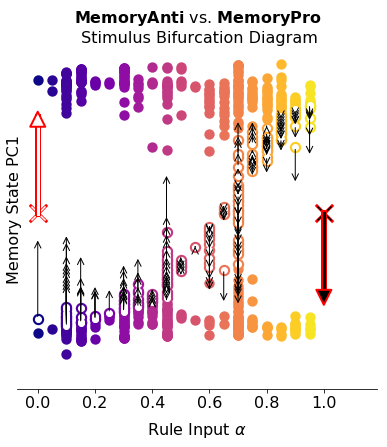

[-0.764974602029396,
 0.7934699210440007,
 -0.764974602029396,
 0.7934699210440007]

In [14]:
from tools_lnd import make_D_use, interp3d, take_names, bifurc, make_FP_axs, gen_D_fp_qr

interp = True
fig_size = 5
linestyle = ['-','-']
tol_q = 1e-6
interp = True
trial_num = [0,0]
t_set = [0,0]
q_thresh = .000008

axs = 'pca_h'

rule_set = [5,2]
rule_str = [rules_dict['all'][rule_set[0]],rules_dict['all'][rule_set[1]]]
rule_axs = 0
trial_set = gen_mov_trial_set(m,rule_set)
D_fp_qr = gen_D_fp_qr(m,trial_set,rule_axs, ['fix1','fix1'],trial_num)

epoch_set = ['stim1','stim1']
rule = rules_dict['all'][rule_set[rule_axs]]

# from tools
tol_q = 1e-6
script_name = 'interp_tasks_small_init_mov'
epoch_set = ['delay1','delay1']
trial1 = gen_trials_from_model_dir(m,rule_str[0],mode='test',noise_on = False)
trial2 = gen_trials_from_model_dir(m,rule_str[1],mode='test',noise_on = False)
trial2 = same_mov_inds(trial1, trial2) 
trial1 = gen_trials_from_model_dir(m,rule_str[0],mode='test',noise_on = False)
save_dir = os.path.join(m,script_name,rule_str[0]+'_'+rule_str[1],'tol_q_e_'+str(-np.log10(tol_q)))
filename_interp = get_interp_filename(trial1,trial2,epoch_set,t_set)
        
fp_dir = os.path.join(m,script_name,rule_str[0]+'_'+rule_str[1],'tol_q_e_'+str(-np.log10(tol_q)),
                      filename_interp+'_step_'+str(0)+'.npz')
D_stim = make_FP_axs(fp_dir, m, rule_str[0], epoch_set[0], axs = axs)

D_use = -D_stim
D_use[:,2] = D_fp_qr[:,0]

epoch_name_ax, rule_name_ax, _, _ = take_names(epoch_set[0],rules_dict['all'][rule_set[rule_axs]])
ax_labels_master = [epoch_name_ax+' State PC1',
             epoch_name_ax+' State PC2',
             epoch_name_ax+' State PC3']

script_name = 'interp_tasks_small_init_stim'
epoch_set = ['stim1','stim1']

ax_labels = {}
ax_labels[1] = ax_labels_master[0]
ax_labels[2] = ax_labels_master[1]
ax_labels[0] = r"Rule Input $\alpha$"

bifurc_local_linear(m,D_use,rule_set,epoch_set,t_set,script_name = script_name,tol_q = tol_q,
       q_thresh = q_thresh,rule_axs = rule_axs, plot_unstable = True,title_y = .95,
       n_skip_interps=1,color_stim = True,fig_size = fig_size,fontsize = 16,
       figpath = figpath,ruleset = ruleset,ax_labels = ax_labels,
       stability_thresh = 1, lims = [], threeD = False,plot_jitter = True)

Variables being optimized:
<tf.Variable 'rnn/leaky_rnn_cell/kernel:0' shape=(276, 256) dtype=float32_ref>
<tf.Variable 'rnn/leaky_rnn_cell/bias:0' shape=(256,) dtype=float32_ref>
<tf.Variable 'output/weights:0' shape=(256, 3) dtype=float32_ref>
<tf.Variable 'output/biases:0' shape=(3,) dtype=float32_ref>
INFO:tensorflow:Restoring parameters from /Users/lauradriscoll/Documents/data/rnn/multitask/stepnet/final/mem_motifs_small/LeakyRNN/softplus/diag/2_tasks/256_n_rnn/lr7.0l2_w6.0_h6.0_delaygo_delayanti/0/model.ckpt
Model restored from file: /Users/lauradriscoll/Documents/data/rnn/multitask/stepnet/final/mem_motifs_small/LeakyRNN/softplus/diag/2_tasks/256_n_rnn/lr7.0l2_w6.0_h6.0_delaygo_delayanti/0/model.ckpt
Variables being optimized:
<tf.Variable 'rnn/leaky_rnn_cell/kernel:0' shape=(276, 256) dtype=float32_ref>
<tf.Variable 'rnn/leaky_rnn_cell/bias:0' shape=(256,) dtype=float32_ref>
<tf.Variable 'output/weights:0' shape=(256, 3) dtype=float32_ref>
<tf.Variable 'output/biases:0' shape=(3

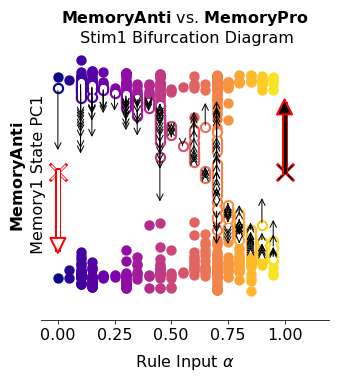

Variables being optimized:
<tf.Variable 'rnn/leaky_rnn_cell/kernel:0' shape=(276, 256) dtype=float32_ref>
<tf.Variable 'rnn/leaky_rnn_cell/bias:0' shape=(256,) dtype=float32_ref>
<tf.Variable 'output/weights:0' shape=(256, 3) dtype=float32_ref>
<tf.Variable 'output/biases:0' shape=(3,) dtype=float32_ref>
INFO:tensorflow:Restoring parameters from /Users/lauradriscoll/Documents/data/rnn/multitask/stepnet/final/mem_motifs_small/LeakyRNN/softplus/diag/2_tasks/256_n_rnn/lr7.0l2_w6.0_h6.0_delaygo_delayanti/0/model.ckpt
Model restored from file: /Users/lauradriscoll/Documents/data/rnn/multitask/stepnet/final/mem_motifs_small/LeakyRNN/softplus/diag/2_tasks/256_n_rnn/lr7.0l2_w6.0_h6.0_delaygo_delayanti/0/model.ckpt
Variables being optimized:
<tf.Variable 'rnn/leaky_rnn_cell/kernel:0' shape=(276, 256) dtype=float32_ref>
<tf.Variable 'rnn/leaky_rnn_cell/bias:0' shape=(256,) dtype=float32_ref>
<tf.Variable 'output/weights:0' shape=(256, 3) dtype=float32_ref>
<tf.Variable 'output/biases:0' shape=(3

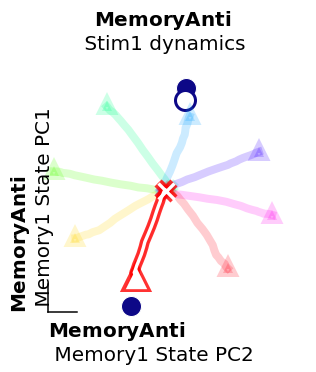

k
Variables being optimized:
<tf.Variable 'rnn/leaky_rnn_cell/kernel:0' shape=(276, 256) dtype=float32_ref>
<tf.Variable 'rnn/leaky_rnn_cell/bias:0' shape=(256,) dtype=float32_ref>
<tf.Variable 'output/weights:0' shape=(256, 3) dtype=float32_ref>
<tf.Variable 'output/biases:0' shape=(3,) dtype=float32_ref>
INFO:tensorflow:Restoring parameters from /Users/lauradriscoll/Documents/data/rnn/multitask/stepnet/final/mem_motifs_small/LeakyRNN/softplus/diag/2_tasks/256_n_rnn/lr7.0l2_w6.0_h6.0_delaygo_delayanti/0/model.ckpt
Model restored from file: /Users/lauradriscoll/Documents/data/rnn/multitask/stepnet/final/mem_motifs_small/LeakyRNN/softplus/diag/2_tasks/256_n_rnn/lr7.0l2_w6.0_h6.0_delaygo_delayanti/0/model.ckpt
Variables being optimized:
<tf.Variable 'rnn/leaky_rnn_cell/kernel:0' shape=(276, 256) dtype=float32_ref>
<tf.Variable 'rnn/leaky_rnn_cell/bias:0' shape=(256,) dtype=float32_ref>
<tf.Variable 'output/weights:0' shape=(256, 3) dtype=float32_ref>
<tf.Variable 'output/biases:0' shape=

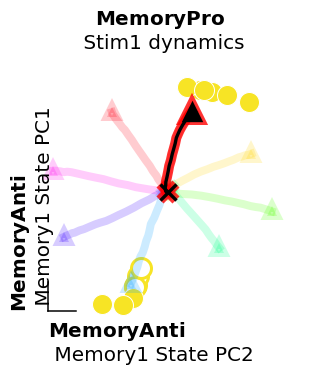

In [11]:
from tools_lnd import make_D_use, interp3d, take_names, bifurc, make_FP_axs

epoch_set = ['delay1','delay1']
D_use = make_D_use(m,rule,epoch_set[0],ti,'pca_h')

epoch_name_ax, rule_name_ax, _, _ = take_names(epoch_set[rule_axs],rule)
ax_labels_master = [r"$\bf{"+rule_name_ax+"}$"+'\n '+epoch_name_ax+' State PC1',
                    r"$\bf{"+rule_name_ax+"}$"+'\n '+epoch_name_ax+' State PC2',
                    r"$\bf{"+rule_name_ax+"}$"+'\n '+epoch_name_ax+' State PC3']

fig_size = 4
q_thresh = .000008
tol_q = 1e-6
interp = True
epoch_set = ['stim1','stim1']
script_name = 'interp_tasks_small_init_stim'

ax_labels = {}
ax_labels[1] = ax_labels_master[0]
ax_labels[2] = ax_labels_master[1]
ax_labels[0] = r"Rule Input $\alpha$"

bifurc_local_linear(m,D_use,rule_set,epoch_set,t_set,script_name = script_name,tol_q = tol_q,
       q_thresh = q_thresh,rule_axs = rule_axs, plot_unstable = True,title_y = .95,
       n_skip_interps=1,color_stim = True,fig_size = fig_size,fontsize = 16,
       figpath = figpath,ruleset = ruleset,ax_labels = ax_labels,
       stability_thresh = 1, lims = [], threeD = False,plot_jitter = True)

ax_use = [1,0,2]
D_rotate = D_use[:,ax_use]
ax_labels = [ax_labels_master[alm] for alm in ax_use]

plot_bifurc_ends(m,D_rotate,rule_set,epoch_set,script_name, lims = [],q_thresh = q_thresh,
                 figpath = figpath, ruleset = ruleset,ax_labels = [ax_labels[0],ax_labels[1]])


####MEMORY PERIOD#####

fig_size = 6
epoch_set = ['delay1','delay1']
script_name = 'interp_tasks_small_init_mov'

q_thresh = .0001

ax_labels = {}
ax_labels[1] = ax_labels_master[0]
ax_labels[2] = ax_labels_master[1]
ax_labels[0] = r"Rule Input $\alpha$"

lims = bifurc(m,D_use,rule_set,epoch_set,t_set,script_name = script_name,tol_q = tol_q,
         q_thresh = q_thresh,rule_axs = rule_axs, plot_unstable = True,
         n_skip_interps=1,color_stim = True,fig_size = fig_size,fontsize = 16,
         figpath = figpath,ruleset = ruleset,ax_labels = ax_labels, stability_thresh = 1.05,
              lims = [], view_ang = [31,-52])

ax_use = [0,1,2]
D_rotate = D_use[:,ax_use]
ax_labels = [ax_labels_master[alm] for alm in ax_use]

plot_bifurc_ends(m,D_use,rule_set,epoch_set,script_name, lims = [], fac_mult_lims = 2, q_thresh = q_thresh,
                 stability_thresh = 1.05,color_stim = True, figpath = figpath, ruleset = ruleset,
                ax_labels = [ax_labels[0],ax_labels[1]])

q_thresh = .1
tol_q = 1e-6
epoch_set = ['go1','go1']
D_use = make_D_use(m,rule,epoch_set[0],ti,'pca_h')

epoch_name_ax, rule_name_ax, _, _ = take_names(epoch_set[rule_axs],rules_dict['all'][rule_set[rule_axs]])
ax_labels_master = [r"$\bf{"+rule_name_ax+"}$"+'\n '+epoch_name_ax+' State PC1',
                    r"$\bf{"+rule_name_ax+"}$"+'\n '+epoch_name_ax+' State PC2',
                    r"$\bf{"+rule_name_ax+"}$"+'\n '+epoch_name_ax+' State PC3']

ax_labels = {}
ax_labels[1] = ax_labels_master[0]
ax_labels[2] = ax_labels_master[1]
ax_labels[0] = r"Rule Input $\alpha$"

lims = bifurc(m,D_use,rule_set,epoch_set,t_set,script_name = script_name,tol_q = tol_q,
         q_thresh = q_thresh,rule_axs = rule_axs, plot_unstable = True,
         n_skip_interps=1,color_stim = True,fig_size = fig_size,fontsize = 16,
         figpath = figpath,ruleset = ruleset,ax_labels = ax_labels, stability_thresh = 2, 
                       lims = [], view_ang = [31,-52])

ax_use = [0,1,2]
D_rotate = D_use[:,ax_use]
ax_labels = [ax_labels_master[alm] for alm in ax_use]

plot_bifurc_ends(m,D_rotate,rule_set,epoch_set,script_name, lims = [],fac_mult_lims = 2, q_thresh = q_thresh,
                 stability_thresh = 1.05, color_stim = True, figpath = figpath, ruleset = ruleset,
                ax_labels = [ax_labels[0],ax_labels[1]])

In [19]:
from tools_lnd import same_stim_trial, load_fps_from_interp, plot_FPs, gen_X_from_model_dir, get_T_inds, plot_N, make_lil_axes
def plot_bifurc_ends(m,D_use,rule_set,epoch_set,script_name,tol_q = 1e-6,t_set = [0,0],
                     q_thresh = .0000001,fig_size = 4, lims = [], fac_mult_lims = 1.5,
                     stability_thresh = 1,fp_first = True, color_stim = True, step_set = [0,19],
                     figpath = 'plot_bifurc_ends',ruleset = 'all',fontsize = 20, 
                     plot_unstable = True,plot_expansion = False,ax_labels = []):
    
    cmap_discrete = ['w','k']
    cmap_grad = plt.get_cmap('plasma')

    rule1 = rules_dict['all'][rule_set[0]]
    rule2 = rules_dict['all'][rule_set[1]]
    rule_str = [rule1,rule2]

    if color_stim:
        trial1 = gen_trials_from_model_dir(m,rule1,mode='test',noise_on = False)
        trial2 = same_stim_trial(trial1, rule_set[1]) 
        trial1 = gen_trials_from_model_dir(m,rule1,mode='test',noise_on = False)
    else:
        trial1 = gen_trials_from_model_dir(m,rule1,mode='test',noise_on = False)
        trial2 = gen_trials_from_model_dir(m,rule2,mode='test',noise_on = False)
        trial2 = same_mov_inds(trial1, trial2) 
        trial1 = gen_trials_from_model_dir(m,rule1,mode='test',noise_on = False)

    save_dir = os.path.join(m,script_name,rule_str[0]+'_'+rule_str[1],'tol_q_e_'+str(-np.log10(tol_q)))

    filename_interp = get_interp_filename(trial1,trial2,epoch_set,t_set)
    trial_set = [trial1, trial2]

    trial_inds = range(0,np.shape(trial1.x)[1],int(np.shape(trial1.x)[1]/8))

    for ri in [0,1]:
        fig = plt.figure(figsize=(fig_size,fig_size),tight_layout=True,facecolor='white')
        ax = fig.add_axes([0,0,1,1])

        sorted_fps, eig_decomps = load_fps_from_interp(m,script_name,rule_str,tol_q,filename_interp,
                                                         step_set[ri],q_thresh)

        if fp_first:
            plot_FPs(ax,sorted_fps, eig_decomps, D_use, step_set[ri], 
                stability_thresh = stability_thresh, plot_unstable = plot_unstable,
                plot_expansion = plot_expansion)
        
        rule = rule_str[ri]
        epoch = epoch_set[ri]
        c_master = cmap_discrete[ri]
        print(c_master)

        trial = gen_trials_from_model_dir(m,rule,mode='test',noise_on = False)

        _,x = gen_X_from_model_dir(m,trial)
        T_inds = get_T_inds(trial,epoch_set[ri])
        T_inds_plot = range(np.max([T_inds[0]-1,0]),T_inds[-1])
        x_epoch = np.transpose(x[:,:,T_inds],(1,2,0))


        cmap_state = plt.get_cmap('hsv')
        if color_stim:
            c_set = np.min(trial.stim_locs[:,[0,2]],axis = 1)
            s = np.argwhere(c_set == np.min(trial1.stim_locs[t_set[0],[0,2]]))[0][0]
            c = cmap_state(c_set[s]/(2*np.pi))
        else:
            c_set = trial.y_loc[-1,:]
            s = np.argwhere(c_set==trial1.y_loc[-1,t_set[0]])[0][0]
            c = cmap_state(c_set[s]/(2*np.pi))

        lw = 10
        plot_N(x_epoch[trial_inds,:,:], D_use.T, c_set[trial_inds], linewidth = fig_size*2, alpha = .2)
        plot_N(x_epoch[[s,],:,:], D_use.T, c, linewidth = lw, alpha = .8 ,markersize = 16)
        plot_N(x_epoch[[s,],:,:], D_use.T, c_master, linewidth = lw/3, alpha = 1 ,markersize = 16)

        if not fp_first:
            plot_FPs(ax,sorted_fps, eig_decomps, D_use, step_set[ri], 
                stability_thresh = stability_thresh, plot_unstable = plot_unstable,
                plot_expansion = plot_expansion)

        if len(lims)>0:
            ax.set_xlim([fac_mult_lims*lims[0],fac_mult_lims*lims[1]])
            ax.set_ylim([fac_mult_lims*lims[2],fac_mult_lims*lims[3]])
        else:
            # [x1,x2] = ax.get_xlim()
            # [y1,y2] = ax.get_ylim()
            # ax.set_xlim([x1-.2*abs(x1),x2+.2*abs(x2)])
            # ax.set_ylim([y1-.2*abs(y1),y2+.2*abs(y2)])
            
            ax.set_ylim([-1.15,1.15])
            ax.set_xlim([-1.15,1.15])

        epoch_name, rule_name, _, _ = take_names(epoch_set[ri],rule_str[ri])
        
        ax.set_ylim([-1.2,1.2])
        ax.set_xlim([-1.2,1.2])
        
        if len(ax_labels)>0:
            make_lil_axes(ax,ax_labels)

        ax.set_ylim([-1.2,1.2])
        ax.set_xlim([-1.2,1.2])

        tit = r"$\bf{"+rule_name+"}$"+'\n '+epoch_name+' dynamics'
        tit_name = rule_name+'_'+epoch_name+'_dynamics'
        plt.title(tit,fontsize = fontsize)#,y = .9
        fig_fldr = os.path.join(figpath,'interp_fps',ruleset,'bifurcation')
        if not os.path.exists(fig_fldr):
            os.makedirs(fig_fldr)

        plt.savefig(os.path.join(figpath,fig_fldr,tit_name+'.pdf'),bbox_inches='tight')
        plt.show()